In [66]:
import pandas as pd
import seaborn as sns
claims = pd.read_csv('ClaimsData.csv')
claims.head()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics

C:\Users\132004\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458005 entries, 0 to 458004
Data columns (total 16 columns):
age                  458005 non-null int64
alzheimers           458005 non-null int64
arthritis            458005 non-null int64
cancer               458005 non-null int64
copd                 458005 non-null int64
depression           458005 non-null int64
diabetes             458005 non-null int64
heart.failure        458005 non-null int64
ihd                  458005 non-null int64
kidney               458005 non-null int64
osteoporosis         458005 non-null int64
stroke               458005 non-null int64
reimbursement2008    458005 non-null int64
bucket2008           458005 non-null int64
reimbursement2009    458005 non-null int64
bucket2009           458005 non-null int64
dtypes: int64(16)
memory usage: 55.9 MB


Total entries: 458005

In [5]:
claims.describe()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009
count,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000,458005.000000
mean,72.628401,0.192214,0.154293,0.064106,0.136071,0.213076,0.380463,0.284744,0.420063,0.161153,0.173996,0.044792,4004.963854,1.436862,4277.432823,1.522160
std,12.557114,0.394041,0.361230,0.244942,0.342864,0.409482,0.485501,0.451293,0.493569,0.367673,0.379106,0.206847,9784.064063,0.861955,8480.041283,0.870425
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,130.000000,1.000000
50%,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,950.000000,1.000000,1540.000000,1.000000
75%,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3110.000000,2.000000,4220.000000,2.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,221640.000000,5.000000,189930.000000,5.000000


All the variables except age and reimbursement are cataegorical

In [7]:
claims.isnull().sum()

age                  0
alzheimers           0
arthritis            0
cancer               0
copd                 0
depression           0
diabetes             0
heart.failure        0
ihd                  0
kidney               0
osteoporosis         0
stroke               0
reimbursement2008    0
bucket2008           0
reimbursement2009    0
bucket2009           0
dtype: int64

No null values in the data

## Visualisations

In [67]:
def age_class(age):
    if(age<40):
        return 'Young'
    elif((age>=40) & (age<50)):
        return'Middle age(40-50)'
    elif((age>=50) & (age<60)):
        return'Middle age(50-60)'
    else:
        return'Old(>60)'
    
claims['agetype']=claims['age'].apply(age_class)

In [68]:
def insurance_class(bucket):
    if(bucket ==1):
        return'Low'
    elif(bucket==2):
        return'Emerging'
    elif(bucket==3):
        return'Moderate'
    elif(bucket==4):
        return'High'
    else:
        return'Very High'
    
claims['bucket2008_type']=claims['bucket2008'].apply(insurance_class)
claims['bucket2009_type']=claims['bucket2009'].apply(insurance_class)

In [32]:
claims.head()

,age,alzheimers,arthritis,cancer,copd,depression,diabetes,heart.failure,ihd,kidney,osteoporosis,stroke,reimbursement2008,bucket2008,reimbursement2009,bucket2009,agetype,bucket2008_type,bucket2009_type
0,85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,Old(>60),Low,Low
1,59,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,Middle age(50-60),Low,Low
2,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,Old(>60),Low,Low
3,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,Middle age(50-60),Low,Low
4,67,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,Old(>60),Low,Low


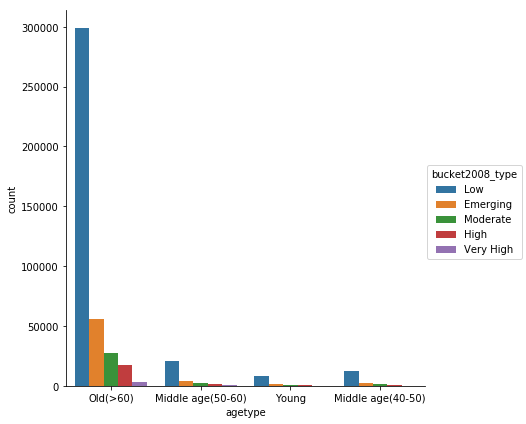

In [69]:
sns.factorplot(x='agetype',hue='bucket2008_type',kind='count',data=claims,size=6)

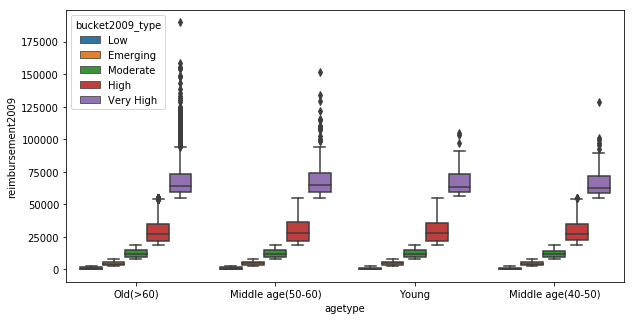

In [71]:
# The amount of reimbursement for each age type and bucket type is shown in the year 2009
plt.figure(figsize=(10,5))
sns.boxplot('agetype','reimbursement2009',hue='bucket2009_type',data = claims)

Text(0.5,1,'Insurance Reimbursement for people affected by cancer in 2008 ')

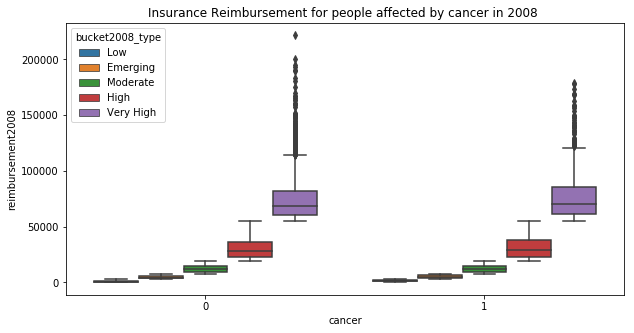

In [49]:
# Insurance Reimbursement for people affected by cancer in 2008
plt.figure(figsize=(10,5))
sns.boxplot('cancer','reimbursement2008', data=claims, hue="bucket2008_type")
plt.title('Insurance Reimbursement for people affected by cancer in 2008 ')

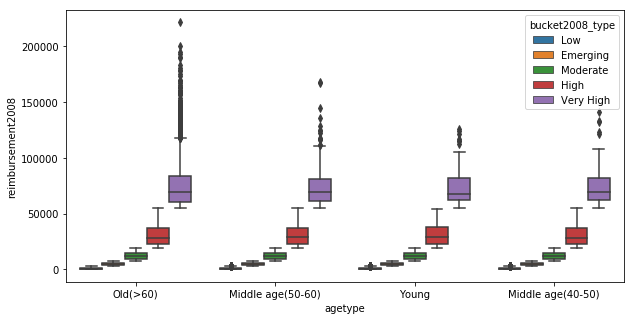

In [38]:
# The amount of reimbursement for each age type and bucket type is shown in the year 2008
plt.figure(figsize=(10,5))
sns.boxplot('agetype','reimbursement2008',hue='bucket2008_type',data = claims)

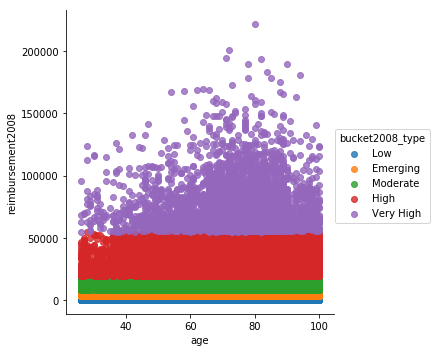

In [42]:
sns.lmplot('age','reimbursement2008',hue='bucket2008_type',data=claims,fit_reg=False)

When the risk factor is high,reimbursement is also high.

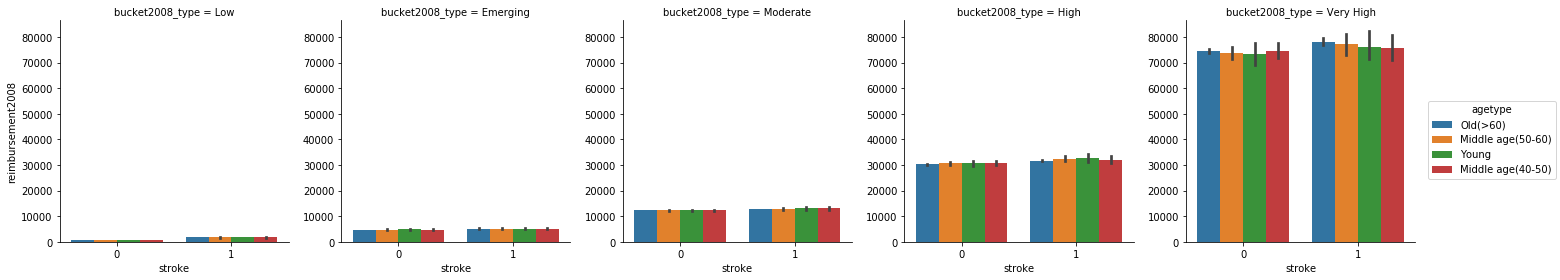

In [44]:
plt.figure(figsize=(10,9))
sns.factorplot('stroke','reimbursement2008',hue='agetype',col='bucket2008_type',data = claims,kind='bar')

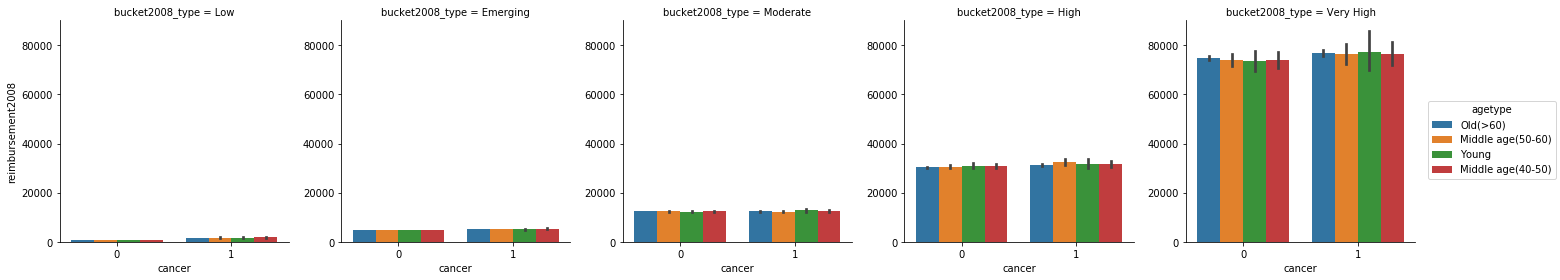

In [47]:
sns.factorplot('cancer','reimbursement2008',hue='agetype',col='bucket2008_type',data=claims,kind='bar')

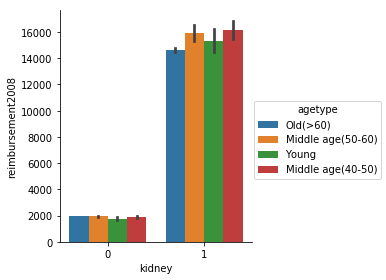

In [48]:
sns.factorplot(x="kidney", y="reimbursement2008", hue="agetype", data=claims, kind="bar")

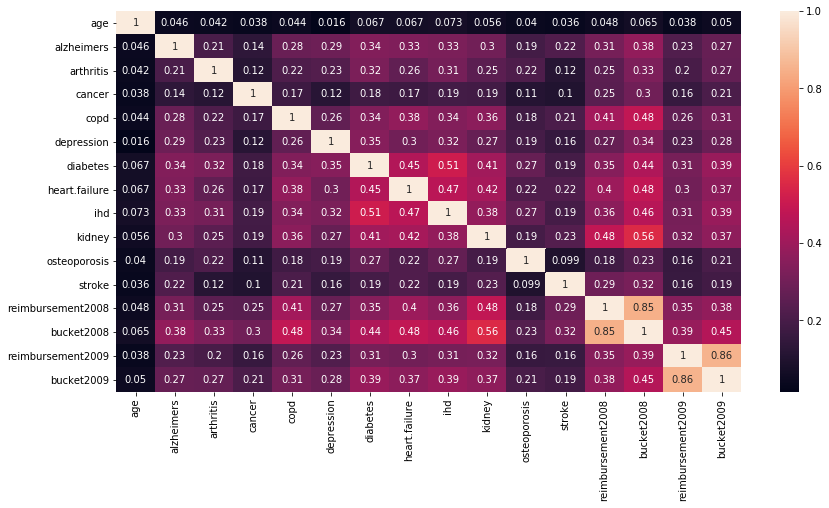

In [50]:
corr = claims.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True)

In [51]:
claims.drop(['agetype','bucket2009_type','bucket2008_type'],axis=1,inplace=True)

## Predictive Analysis

1    340202
2     63173
3     30847
4     19914
5      3869
Name: bucket2008, dtype: int64


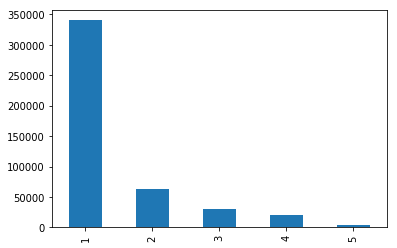

In [52]:
dist = claims['bucket2008'].value_counts()
dist.plot(kind='bar')
print(dist)

#### This is imbalanced dataset

In [53]:
X = claims.drop(['reimbursement2008','bucket2008'],axis=1)
y = claims['bucket2008'] 

In [54]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[  0.98522732,  -0.48780296,  -0.42713315, ...,  -0.21654676,
         -0.50441234,  -0.5998915 ],
       [ -1.08531434,  -0.48780296,  -0.42713315, ...,  -0.21654676,
         -0.50441234,  -0.5998915 ],
       [ -0.4482246 ,  -0.48780296,  -0.42713315, ...,  -0.21654676,
         -0.50441234,  -0.5998915 ],
       ..., 
       [  0.26850136,  -0.48780296,   2.34119035, ...,   4.6179402 ,
         17.86933902,   3.99556757],
       [  0.74631866,   2.05000807,  -0.42713315, ...,   4.6179402 ,
         18.22193203,   3.99556757],
       [  0.58704623,   2.05000807,  -0.42713315, ...,   4.6179402 ,
         21.89290873,   3.99556757]])

In [55]:
# Using class_weight='balanced' for handling the imbalance in the dataset.
tree = DecisionTreeClassifier(criterion='entropy',max_depth=6,class_weight='balanced')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=145)

In [56]:
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [57]:
conf = metrics.confusion_matrix(y_test,y_pred)
print(conf)

[[80460 15471  5114   264   688]
 [ 3620  8211  4849   487  1861]
 [  789  2318  3009   497  2566]
 [  199   742  1572   576  2918]
 [   17    49   226    93   806]]


0.677297273693


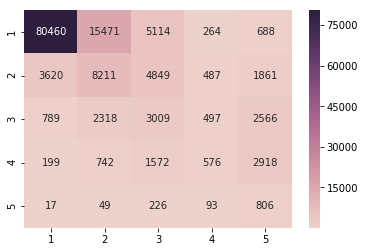

In [58]:
print(metrics.accuracy_score(y_test,y_pred))
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5],fmt='d',annot=True)

In [59]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.95      0.79      0.86    101997
          2       0.31      0.43      0.36     19028
          3       0.20      0.33      0.25      9179
          4       0.30      0.10      0.15      6007
          5       0.09      0.68      0.16      1191

avg / total       0.77      0.68      0.71    137402



In [60]:
#Calculate null accuracy 
y_test.value_counts().head(1)/len(y_test)

1    0.742325
Name: bucket2008, dtype: float64

In [61]:
#Applying ensemble method (Random Forest)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
pred = forest.predict(X_test)

In [62]:
print(metrics.accuracy_score(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))

0.746306458421
[[93620  6117  1610   604    46]
 [10064  5568  2103  1171   122]
 [ 3165  2803  1773  1276   162]
 [ 1173  1635  1480  1507   212]
 [  119   232   340   424    76]]
             precision    recall  f1-score   support

          1       0.87      0.92      0.89    101997
          2       0.34      0.29      0.31     19028
          3       0.24      0.19      0.22      9179
          4       0.30      0.25      0.27      6007
          5       0.12      0.06      0.08      1191

avg / total       0.72      0.75      0.73    137402



In [63]:
#Using class_weight='balanced' for handling the imbalance in the dataset.

rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)

In [64]:
print(metrics.accuracy_score(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))

0.745789726496
[[93556  6251  1609   537    44]
 [10141  5569  2091  1128    99]
 [ 3174  2745  1790  1333   137]
 [ 1215  1595  1473  1506   218]
 [  117   243   332   447    52]]
             precision    recall  f1-score   support

          1       0.86      0.92      0.89    101997
          2       0.34      0.29      0.31     19028
          3       0.25      0.20      0.22      9179
          4       0.30      0.25      0.27      6007
          5       0.09      0.04      0.06      1191

avg / total       0.72      0.75      0.73    137402

